In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import requests

url = "https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.xlsx?__blob=publicationFile"

resp = requests.get(url)

with open('Nowcasting_Zahlen.xlsx', 'wb') as output:
    output.write(resp.content)

In [3]:
data = pd.read_excel("./Nowcasting_Zahlen.xlsx",sheet_name=1)
data.tail(3)

,Datum des Erkrankungsbeginns,Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung),Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glä,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glät,Punktschätzer der Anzahl Neuerkrankungen,Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Punktschätzer der Reproduktionszahl R,Untere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Obere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Punktschätzer des 7-Tage-R Wertes,Untere Grenze des 95%-Prädiktionsintervalls des 7-Tage-R Wertes,Obere Grenze des 95%-Prädiktionsintervalls des 7-Tage-R Wertes
75,2020-05-16,510,385,639,547,444,654,0.90,0.80,0.99,0.90,0.83,0.97
76,2020-05-17,463,311,643,520,399,652,0.86,0.73,0.99,0.91,0.83,1.00
77,2020-05-18,538,337,786,515,363,688,0.85,0.71,1.00,NaN,NaN,NaN


In [4]:
to_date = pd.to_datetime

In [5]:
col_date = data.columns[0]
col_r = data.columns[-6]
col_rmin = data.columns[-5]
col_rmax = data.columns[-4]

last = {}
last['date'], last['r'], last['rmin'], last['rmax'] = data.iloc[-1][[col_date,col_r,col_rmin,col_rmax]]

#Hier wäre es vermutlich besser die Auswahl der Spalten durch den Namen durchzuführen,
#falls sich die Indizes der Spalten in zukünftigen Veröffentlichungen ändern.

In [6]:
data2 = pd.read_excel("./Nowcasting_Zahlen.xlsx",sheet_name=0)
data2.head(3)

,Ergebnisse des Nowcastings und der Schätzung der Reproduktionszahl R
0,"Datenstand: 22.05.2020, 0 Uhr"
1,"Die Ergebnisse des Nowcastings, also die Schät..."
2,Dabei wird jeder Wert mit den Werten der 3 vor...


In [7]:
import re

date_status = data2[data2.iloc[:, 0].str.match('Datenstand')].iloc[0,0]
print(date_status)
date = re.search("([0-9]{2}\.[0-9]{2}\.[0-9]{4})", date_status)[0]
print(date)

Datenstand: 22.05.2020, 0 Uhr
22.05.2020


In [8]:
from datetime import datetime

date_save = datetime.strptime(date, "%d.%m.%Y").strftime("%Y-%m-%d")

#Formatierung des Datums für die Speicherung des Plots als plot_yyyy-mm-dd.png.

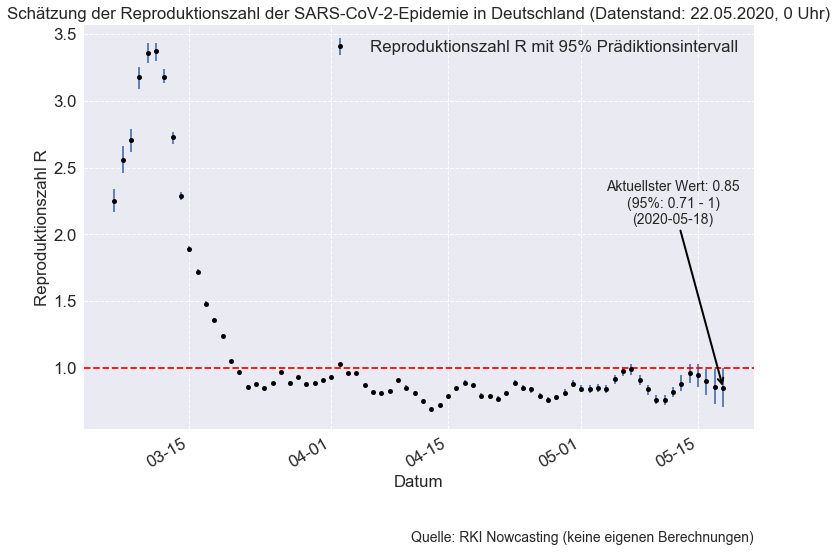

In [9]:
matplotlib.style.use('seaborn')
s = 1.5
fs = 'large'
params = {'font.size' : 14,
          'legend.fontsize': fs,
          'figure.figsize': (8*s,5.5*s),
          'axes.labelsize': fs,
          'axes.titlesize':fs,
          'xtick.labelsize':fs,
          'ytick.labelsize':fs,
          'axes.formatter.use_locale': True}
plt.rcParams.update(params)

arrowprops = {'arrowstyle': '->','lw':2}

fig = plt.figure()
plt.title("Schätzung der Reproduktionszahl der SARS-CoV-2-Epidemie in Deutschland ({})".format(date_status))
plt.figtext(0.9, 0.01, 'Quelle: RKI Nowcasting (keine eigenen Berechnungen)', horizontalalignment='right')
plt.xlabel("Datum")
plt.ylabel("Reproduktionszahl R")

plt.errorbar(data[col_date],data[col_r],[data[col_r]-data[col_rmin],data[col_rmax]-data[col_r]],linestyle="None", 
             marker = 'o', markerfacecolor = 'k', markersize = 5.0,
             label="Reproduktionszahl R mit 95% Prädiktionsintervall")

fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m-%d"))


last_text = "Aktuellster Wert: {:n}\n(95%: {:n} - {:n})\n({})".format(last['r'],last['rmin'],last['rmax'],last['date'].isoformat()[:10])
last_xy = (last['date'],last['r'])
last_xytext = (last['date']-pd.Timedelta(days=6),2.08)
plt.annotate(last_text,last_xy,last_xytext,arrowprops=arrowprops,ha='center')

plt.axhline(1,c='red',ls='--')
plt.grid(ls='--')
plt.legend()
plt.savefig("plot_{}.png".format(date_save),dpi=100)